In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2024-01-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2024_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2024-01-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2024-01-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   7500     Î∂ÅÍµ¨   
2   2024-01-11     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   4500     Î∂ÅÍµ¨  14271     Î∂ÅÍµ¨   
3   2024-01-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000     Î∂ÅÍµ¨   4875     Î∂ÅÍµ¨   
4   2024-01-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990     Î∂ÅÍµ¨   4200     Î∂ÅÍµ¨   
5   2024-01-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5825     Î∂ÅÍµ¨   9700     Î∂ÅÍµ¨   
6   2024-01-11     ÎåÄÌåå                      1.0„éè   4200     Î∂ÅÍµ¨   4780     Î∂ÅÍµ¨   
7   2024-01-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11950     Î∂ÅÍµ¨  13900     Î∂ÅÍµ¨   
8   2024-01-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   6164     Î∂ÅÍµ¨   
9   2024-01-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
10  2024-01-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1670     Î∂ÅÍµ¨   1680     Î∂ÅÍµ¨   
11  2024-01-11      Î¨¥                   2.0„éè 1Í∞ú   1322     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
12  2024-01-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2024-01-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   4300     Î∂ÅÍµ¨   6360     Î∂ÅÍµ¨   
14  2024-01-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  25000     Î∂ÅÍµ¨  32936     Î∂ÅÍµ¨   
15  2024-01-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2030     Î∂ÅÍµ¨   2730     Î∂ÅÍµ¨   
16  2024-01-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4250     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
17  2024-01-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16330     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
18  2024-01-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  25000     Î∂ÅÍµ¨  31752     Î∂ÅÍµ¨   
19  2024-01-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2780     Î∂ÅÍµ¨   
20  2024-01-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380     Î∂ÅÍµ¨   2380     Î∂ÅÍµ¨   
21  2024-01-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1340     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
22  2024-01-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44500     Î∂ÅÍµ¨  59900     Î∂ÅÍµ¨   
23  2024-01-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6980     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
24  2024-01-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900     Î∂ÅÍµ¨  61900     Î∂ÅÍµ¨   
25  2024-01-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3260     Î∂ÅÍµ¨   3480     Î∂ÅÍµ¨   
26  2024-01-11    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6980     Î∂ÅÍµ¨  11459     Î∂ÅÍµ¨   
27  2024-01-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©   1030     Î∂ÅÍµ¨   1040     Î∂ÅÍµ¨   
28  2024-01-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8680     Î∂ÅÍµ¨  10600     Î∂ÅÍµ¨   
29  2024-01-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
30  2024-01-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2600     Î∂ÅÍµ¨   3730     Î∂ÅÍµ¨   
31  2024-01-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  10353     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    3475    46.8%   9,163  
1    1700   29.31%   6,650  
2    9771  217.13%   9,386  
3     875   21.88%   4,438  
4     210    5.26%   4,095  
5    3875   66.52%   7,763  
6     580   13.81%   4,490  
7    1950   16.32%  12,925  
8    4664  310.93%   3,832  
9       0     0.0%     780  
10     10     0.6%   1,675  
11    258   19.52%   1,451  
12    150    3.26%   4,675  
13   2060   47.91%   5,330  
14   7936   31.74%  28,968  
15    700   34.48%   2,380  
16   6650  156.47%   7,575  
17    150    0.92%  1

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2024-04-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2024_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2024-04-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2024-04-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   7500     Î∂ÅÍµ¨   
2   2024-04-11     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   5500     Î∂ÅÍµ¨  22111     Î∂ÅÍµ¨   
3   2024-04-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4500     Î∂ÅÍµ¨   5625     Î∂ÅÍµ¨   
4   2024-04-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990     Î∂ÅÍµ¨   4200     Î∂ÅÍµ¨   
5   2024-04-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7491     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
6   2024-04-11     ÎåÄÌåå                      1.0„éè   1980     Î∂ÅÍµ¨   4000     Î∂ÅÍµ¨   
7   2024-04-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9450     Î∂ÅÍµ¨   9950     Î∂ÅÍµ¨   
8   2024-04-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3980     Î∂ÅÍµ¨   4311     Î∂ÅÍµ¨   
9   2024-04-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
10  2024-04-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1670     Î∂ÅÍµ¨   1680     Î∂ÅÍµ¨   
11  2024-04-11      Î¨¥                   2.0„éè 1Í∞ú   1580     Î∂ÅÍµ¨   2744     Î∂ÅÍµ¨   
12  2024-04-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2024-04-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  47000     Î∂ÅÍµ¨  61626     Î∂ÅÍµ¨   
14  2024-04-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3720     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
15  2024-04-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4250     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
16  2024-04-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16330     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
17  2024-04-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  32325     Î∂ÅÍµ¨  33000     Î∂ÅÍµ¨   
18  2024-04-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2780     Î∂ÅÍµ¨   
19  2024-04-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380     Î∂ÅÍµ¨   2380     Î∂ÅÍµ¨   
20  2024-04-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1340     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
21  2024-04-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  32800     Î∂ÅÍµ¨  57900     Î∂ÅÍµ¨   
22  2024-04-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6980     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
23  2024-04-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44900     Î∂ÅÍµ¨  48900     Î∂ÅÍµ¨   
24  2024-04-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3660     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
25  2024-04-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©   1030     Î∂ÅÍµ¨   1040     Î∂ÅÍµ¨   
26  2024-04-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8680     Î∂ÅÍµ¨  10600     Î∂ÅÍµ¨   
27  2024-04-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
28  2024-04-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2400     Î∂ÅÍµ¨   2680     Î∂ÅÍµ¨   
29  2024-04-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     475    4.56%  10,663  
1    1700   29.31%   6,650  
2   16611  302.02%  13,806  
3    1125    25.0%   5,063  
4     210    5.26%   4,095  
5    2409   32.16%   8,696  
6    2020  102.02%   2,990  
7     500    5.29%   9,700  
8     331    8.32%   4,146  
9       0     0.0%     780  
10     10     0.6%   1,675  
11   1164   73.67%   2,162  
12    330    7.47%   4,585  
13  14626   31.12%  54,313  
14    260    6.99%   3,850  
15   5650  132.94%   7,075  
16    150    0.92%  16,405  
17    675    2.09%  32,663  
18    464   20.03%   2,548  
19      0     0.0%   2,380  
20    240   17.91%   1,460  
21  25100   76.52%  45,350  
22   1500   21.49%   7,730  
23   4000    8.91%  46,900  
24    320    8.74%  

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2024-07-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2024_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2024-07-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2024-07-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   7500     Î∂ÅÍµ¨   
2   2024-07-11     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   5500     Î∂ÅÍµ¨   9000     Î∂ÅÍµ¨   
3   2024-07-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3500     Î∂ÅÍµ¨   4271     Î∂ÅÍµ¨   
4   2024-07-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4200     Î∂ÅÍµ¨   5990     Î∂ÅÍµ¨   
5   2024-07-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9158     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
6   2024-07-11     ÎåÄÌåå                      1.0„éè   1880     Î∂ÅÍµ¨   3560     Î∂ÅÍµ¨   
7   2024-07-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  17450     Î∂ÅÍµ¨  18900     Î∂ÅÍµ¨   
8   2024-07-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4280     Î∂ÅÍµ¨   4311     Î∂ÅÍµ¨   
9   2024-07-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
10  2024-07-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1670     Î∂ÅÍµ¨   1680     Î∂ÅÍµ¨   
11  2024-07-11      Î¨¥                   2.0„éè 1Í∞ú   1290     Î∂ÅÍµ¨   2180     Î∂ÅÍµ¨   
12  2024-07-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2024-07-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8600     Î∂ÅÍµ¨  11660     Î∂ÅÍµ¨   
14  2024-07-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  60000     Î∂ÅÍµ¨  83700     Î∂ÅÍµ¨   
15  2024-07-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3453     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
16  2024-07-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4250     Î∂ÅÍµ¨  10800     Î∂ÅÍµ¨   
17  2024-07-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16330     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
18  2024-07-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  28167     Î∂ÅÍµ¨  45000     Î∂ÅÍµ¨   
19  2024-07-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2980     Î∂ÅÍµ¨   3066     Î∂ÅÍµ¨   
20  2024-07-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380     Î∂ÅÍµ¨   2400     Î∂ÅÍµ¨   
21  2024-07-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1340     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
22  2024-07-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  53800     Î∂ÅÍµ¨  54000     Î∂ÅÍµ¨   
23  2024-07-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
24  2024-07-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45900     Î∂ÅÍµ¨  61800     Î∂ÅÍµ¨   
25  2024-07-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1660     Î∂ÅÍµ¨   2280     Î∂ÅÍµ¨   
26  2024-07-11    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6980     Î∂ÅÍµ¨   9990     Î∂ÅÍµ¨   
27  2024-07-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©   1030     Î∂ÅÍµ¨   1040     Î∂ÅÍµ¨   
28  2024-07-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6480     Î∂ÅÍµ¨  10600     Î∂ÅÍµ¨   
29  2024-07-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
30  2024-07-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980     Î∂ÅÍµ¨   3730     Î∂ÅÍµ¨   
31  2024-07-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     475    4.56%  10,663  
1    1700   29.31%   6,650  
2    3500   63.64%   7,250  
3     771   22.03%   3,886  
4    1790   42.62%   5,095  
5    1742   19.02%  10,029  
6    1680   89.36%   2,720  
7    1450    8.31%  18,175  
8      31    0.72%   4,296  
9       0     0.0%     780  
10     10     0.6%   1,675  
11    890   68.99%   1,735  
12    330    7.47%   4,585  
13   3060   35.58%  10,130  
14  23700    39.5%  71,850  
15    527   15.26%   3,717  
16   6550  154.12%   7,525  
17    150    0.92%  1

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2024-10-17"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2024_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2024-10-17   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2024-10-17     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   7500     Î∂ÅÍµ¨   9800     Î∂ÅÍµ¨   
2   2024-10-17     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   4500     Î∂ÅÍµ¨  17666     Î∂ÅÍµ¨   
3   2024-10-17    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000     Î∂ÅÍµ¨   4987     Î∂ÅÍµ¨   
4   2024-10-17     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4200     Î∂ÅÍµ¨   5990     Î∂ÅÍµ¨   
5   2024-10-17    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9158     Î∂ÅÍµ¨  10500     Î∂ÅÍµ¨   
6   2024-10-17     ÎåÄÌåå                      1.0„éè   2580     Î∂ÅÍµ¨   4780     Î∂ÅÍµ¨   
7   2024-10-17   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12900     Î∂ÅÍµ¨  15950     Î∂ÅÍµ¨   
8   2024-10-17     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4250     Î∂ÅÍµ¨   6164     Î∂ÅÍµ¨   
9   2024-10-17     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
10  2024-10-17     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1680     Î∂ÅÍµ¨   1710     Î∂ÅÍµ¨   
11  2024-10-17      Î¨¥                   2.0„éè 1Í∞ú   2980     Î∂ÅÍµ¨   3590     Î∂ÅÍµ¨   
12  2024-10-17    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2024-10-17     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6990     Î∂ÅÍµ¨   7000     Î∂ÅÍµ¨   
14  2024-10-17      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  31980     Î∂ÅÍµ¨  33000     Î∂ÅÍµ¨   
15  2024-10-17     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   7980     Î∂ÅÍµ¨   8990     Î∂ÅÍµ¨   
16  2024-10-17  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4250     Î∂ÅÍµ¨   9449     Î∂ÅÍµ¨   
17  2024-10-17   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16330     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
18  2024-10-17     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  32789     Î∂ÅÍµ¨  33000     Î∂ÅÍµ¨   
19  2024-10-17    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   3066     Î∂ÅÍµ¨   3580     Î∂ÅÍµ¨   
20  2024-10-17     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380     Î∂ÅÍµ¨   2400     Î∂ÅÍµ¨   
21  2024-10-17     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1340     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
22  2024-10-17    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  57500     Î∂ÅÍµ¨  59900     Î∂ÅÍµ¨   
23  2024-10-17    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7480     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
24  2024-10-17      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  42000     Î∂ÅÍµ¨  54900     Î∂ÅÍµ¨   
25  2024-10-17     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2980     Î∂ÅÍµ¨   3200     Î∂ÅÍµ¨   
26  2024-10-17    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6980     Î∂ÅÍµ¨  15136     Î∂ÅÍµ¨   
27  2024-10-17     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©   1030     Î∂ÅÍµ¨   1040     Î∂ÅÍµ¨   
28  2024-10-17    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6280     Î∂ÅÍµ¨  11880     Î∂ÅÍµ¨   
29  2024-10-17   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
30  2024-10-17     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2740     Î∂ÅÍµ¨   3920     Î∂ÅÍµ¨   
31  2024-10-17    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     475    4.56%  10,663  
1    2300   30.67%   8,650  
2   13166  292.58%  11,083  
3     987   24.68%   4,494  
4    1790   42.62%   5,095  
5    1342   14.65%   9,829  
6    2200   85.27%   3,680  
7    3050   23.64%  14,425  
8    1914   45.04%   5,207  
9       0     0.0%     780  
10     30    1.79%   1,695  
11    610   20.47%   3,285  
12    330    7.47%   4,585  
13     10    0.14%   6,995  
14   1020    3.19%  32,490  
15   1010   12.66%   8,485  
16   5199  122.33%   6,850  
17    150    0.92%  1

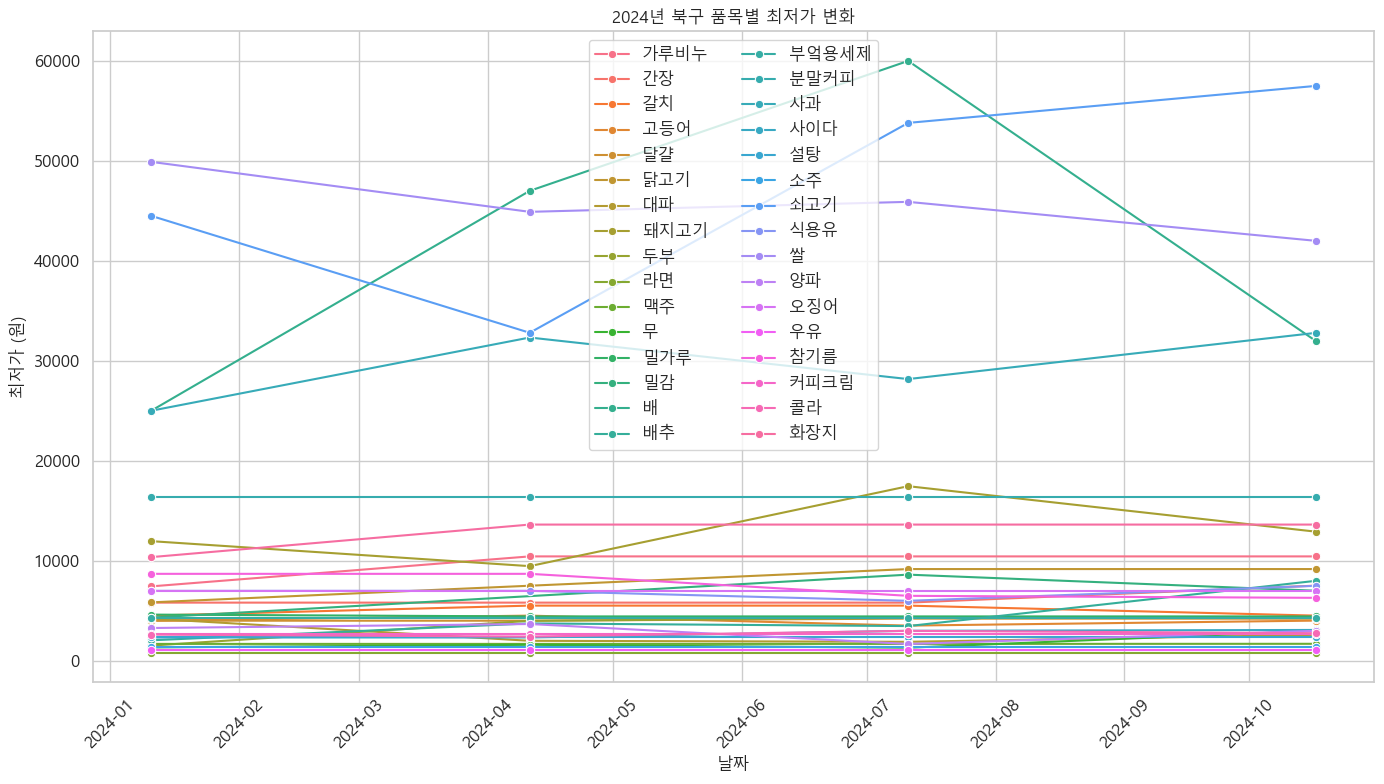

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2024_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2024_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2024_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2024_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2024ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2024_min.csv", index=False, encoding="utf-8-sig")

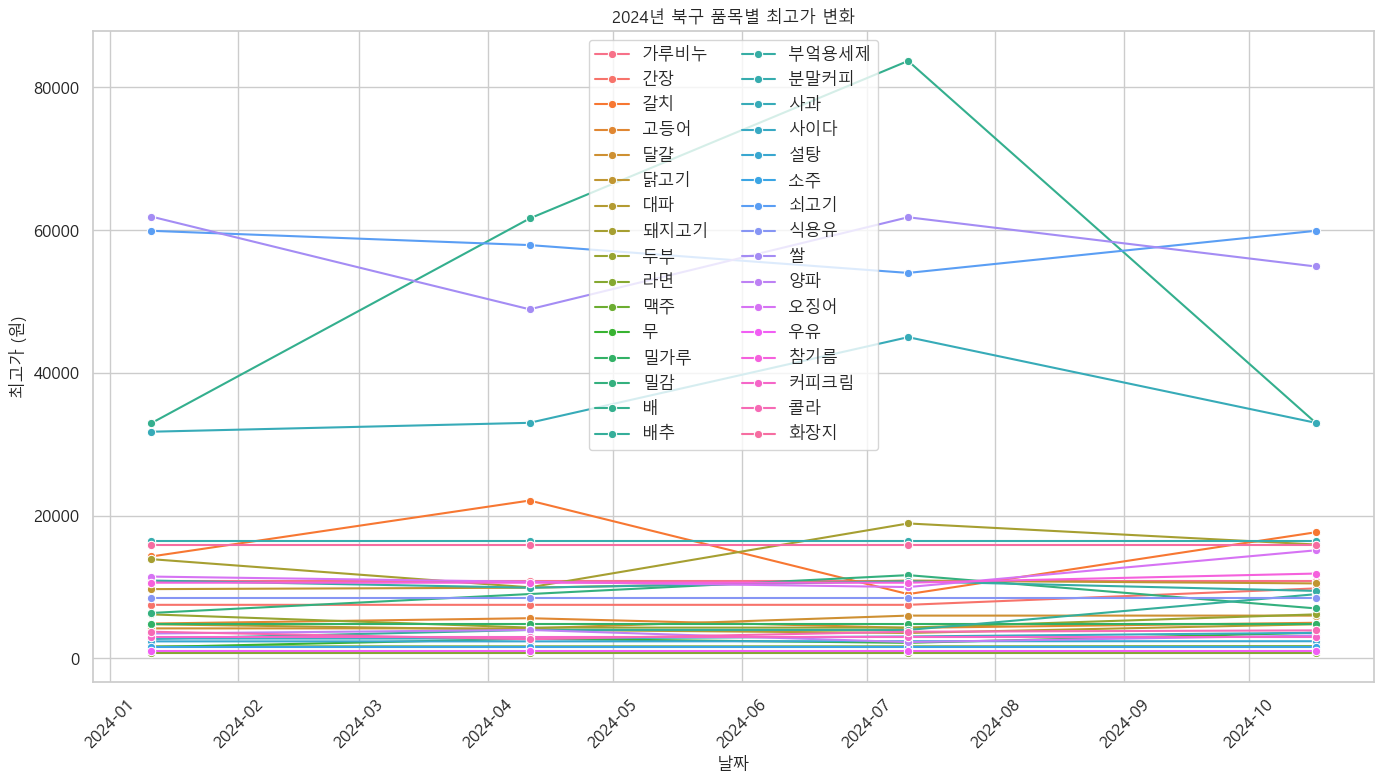

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2024_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2024_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2024_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2024_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2024ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2024_max.csv", index=False, encoding="utf-8-sig")